Il Data Cleaning ha i problemi legati al GIGO (garbage input, garbage output). perciò i problemi possono essere causati dalla:
* precisioni dei dati
* percentuale dei missing values e outlayer
* presenza di dati duplicati

### Strategia trattamento missing values:
* deletion: cancellare gli individui che presentano dei missing values
* imputation: sostituire i valori NAN con degli altri valori (moda, media, mediana, valore precedente)

### Preparare i dati per l'analisi
* standardizzare i dati
* normalizzare i dati

# Moduli

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Analisi

In [3]:
HousePrice= pd.read_csv("https://raw.githubusercontent.com/ettore1461/My-Introduction-to-Statistical-Learning/master/Dataset/house-prices-advanced-regression-techniques/test.csv")

In [18]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
HousePrice.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

Mostro con questo metodo tutte le variabili che presentano dei NAN

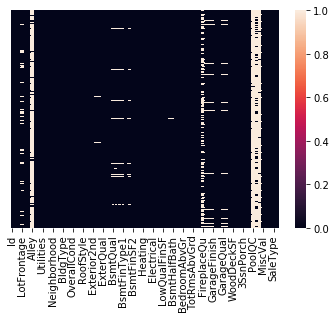

In [95]:
sns.heatmap(HousePrice.isnull(),yticklabels=False)

## Tecnica di deletion

In [11]:
HousePrice.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In questo caso non funziona perchè ho dei valori NAN presenti in tutti gli individui, perciò non è una tecnica efficiente

In [13]:
HousePrice.dropna(axis=1).head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,Normal


Rimuovendo le variabili che invece contengono NAN arrivo a definire un sottodataset di 47 variabili. ero partito da 80 variabili, ne ho perse 33

## Tecnica Imputation

In [15]:
HousePrice.fillna(0).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,120,0,0,MnPrv,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,0,IR1,HLS,AllPub,...,144,0,0,0,0,0,1,2010,WD,Normal


Sostituisco i valori NAN con il valore 0

In [20]:
HousePrice.fillna(HousePrice.mean())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.000000,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,68.580357,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.000000,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.000000,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.000000,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [19]:
HousePrice.mean()

Id               2190.000000
MSSubClass         57.378341
LotFrontage        68.580357
LotArea          9819.161069
OverallQual         6.078821
OverallCond         5.553804
YearBuilt        1971.357779
YearRemodAdd     1983.662783
MasVnrArea        100.709141
BsmtFinSF1        439.203704
BsmtFinSF2         52.619342
BsmtUnfSF         554.294925
TotalBsmtSF      1046.117970
1stFlrSF         1156.534613
2ndFlrSF          325.967786
LowQualFinSF        3.543523
GrLivArea        1486.045922
BsmtFullBath        0.434454
BsmtHalfBath        0.065202
FullBath            1.570939
HalfBath            0.377656
BedroomAbvGr        2.854010
KitchenAbvGr        1.042495
TotRmsAbvGrd        6.385195
Fireplaces          0.581220
GarageYrBlt      1977.721217
GarageCars          1.766118
GarageArea        472.768861
WoodDeckSF         93.174777
OpenPorchSF        48.313914
EnclosedPorch      24.243317
3SsnPorch           1.794380
ScreenPorch        17.064428
PoolArea            1.744345
MiscVal       

Tecnicamente questo metodo dovrebbe sostituire i valori con la media, ma il problema è che non si può fare la medie per le variabili non quantitative

In [21]:
from sklearn.preprocessing import Imputer

Creo un oggetto Imputatore che mi permette di andare a sostituire i valori NAN del dataset avendo analizzato lo stesso dataset

In [88]:
imp= Imputer(missing_values="NaN",strategy="most_frequent",axis=0,verbose=1)

In [123]:
def asFactor(df): # funzione per trasforare le variabili in categoriali
    types=df.dtypes
    types=types==object
    
    change= lambda x: x.astype("category")
    df.loc[:,types]=df.loc[:,types].apply(change)

In [93]:
asFactor(HousePrice)
HousePrice.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
                   ...   
HalfBath            int64
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual      category
TotRmsAbvGrd        int64
Functional       category
Fireplaces          int64
FireplaceQu 

In [124]:
not_cat= HousePrice.dtypes!="category"
df_int=HousePrice.loc[:,not_cat]# DataFrame di variabili quantitative

In [117]:
miss_var=df_int.isnull().sum()>0
imp=imp.fit(df_int.loc[:,miss_var])

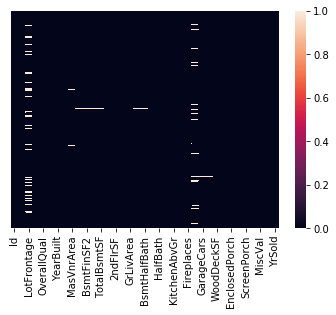

In [114]:
sns.heatmap(df_int.isnull(),yticklabels=False)

In [121]:
df_int.loc[:,miss_var]=imp.transform(df_int.loc[:,miss_var])

/home/ettore1461/anaconda3/envs/sheep/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


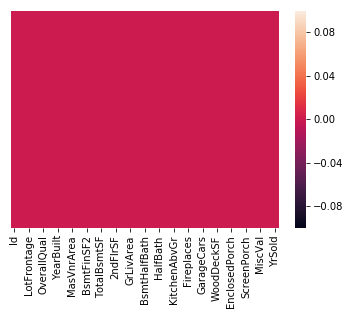

In [122]:
sns.heatmap(df_int.isnull(),yticklabels=False)

L'**Imputer** funziona solo con le variabili quantitative e non con quelle qualitative

### Per i dati categoriali
La pulizia dei dati categoriali è più complessa, poichè 

In [127]:
HousePrice.MSZoning.value_counts(dropna=False) # Mostro il numero si modalità

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [134]:
HousePrice.MSZoning.mode()

0    RL
Name: MSZoning, dtype: category
Categories (5, object): [C (all), FV, RH, RL, RM]

In [5]:
cat_var= HousePrice.dtypes==object

In [1]:
temp=HousePrice.loc[:,cat_var]
HousePrice.loc[:,cat_var]=HousePrice.loc[:,cat_var].fillna(value=temp.mode().transpose()[0]) # sostituire con la moda

NameError: name 'HousePrice' is not defined

Questo accrocchio è stato fatto per aggirare il problema che la funzione fillna, passatogli un dataframe, sostituiva solo la prima riga del dataset